In [12]:
import numpy as np
import pynbody
import matplotlib.pyplot as plt
import matplotlib as mpl
import pynbody.plot as pp
import pickle
import pandas as pd
import pynbody.plot.sph as sph

In [2]:
pynbody.config['halo-class-priority'] =  [pynbody.halo.ahf.AHFCatalogue,
                                          pynbody.halo.GrpCatalogue,
                                          pynbody.halo.AmigaGrpCatalogue,
                                          pynbody.halo.legacy.RockstarIntermediateCatalogue,
                                          pynbody.halo.rockstar.RockstarCatalogue,
                                          pynbody.halo.subfind.SubfindCatalogue,
                                          pynbody.halo.hop.HOPCatalogue]

In [3]:
sim1 = '/home/akinshol/Data/Sims/h148.cosmo50PLK.3072g3HbwK1BH/h148.cosmo50PLK.3072g3HbwK1BH.004096/h148.cosmo50PLK.3072g3HbwK1BH.004096'
sim2 = '/home/akinshol/Data/Sims/h229.cosmo50PLK.3072gst5HbwK1BH/h229.cosmo50PLK.3072gst5HbwK1BH.004096/h229.cosmo50PLK.3072gst5HbwK1BH.004096'
sim3 = '/home/akinshol/Data/Sims/h242.cosmo50PLK.3072gst5HbwK1BH/h242.cosmo50PLK.3072gst5HbwK1BH.004096/h242.cosmo50PLK.3072gst5HbwK1BH.004096'
sim4 = '/home/akinshol/Data/Sims/h329.cosmo50PLK.3072gst5HbwK1BH/h329.cosmo50PLK.3072gst5HbwK1BH.004096/h329.cosmo50PLK.3072gst5HbwK1BH.004096'

# here is where we will put whatever halo numbers we decide are interesting and worth computing
# i.e. all the halos with stars in them

nums1 = [1, 2, 3, 5, 6, 7, 9, 10, 11, 12, 13, 14, 17, 18, 20, 21, 22, 23, 26, 27, 28, 30, 31, 32, 34, 36, 37, 38, 40, 41, 42, 45, 46, 48, 55, 57, 58, 60, 64, 71, 73, 77, 80, 91, 94, 95, 99, 106, 115, 121, 125, 126, 131, 140, 143, 160, 223, 252, 264, 271, 304, 353, 372, 373, 435, 465, 590, 647, 677, 682, 738, 869, 961, 980, 1146, 1155, 1381, 2792, 4897, 10814]
nums2 = [1, 2, 3, 4, 7, 14, 16, 17, 18, 19, 21, 22, 25, 27, 28, 29, 30, 33, 36, 41, 50, 51, 52, 56, 60, 62, 70, 73, 75, 95, 104, 108, 134, 203, 277, 553, 982, 1319, 1409, 1481, 4380, 5722]
nums3 = [1, 4, 9, 10, 11, 12, 19, 24, 29, 30, 33, 36, 39, 40, 45, 46, 48, 53, 57, 62, 66, 69, 70, 72, 75, 76, 85, 89, 102, 133, 152, 185, 211, 302, 425, 457, 536, 1773, 2748, 2891, 9059, 9126, 10085, 11901]
nums4 = [1, 8, 9, 13, 14, 19, 25, 31, 32, 40, 47, 63, 92, 99, 126, 129, 135, 170, 195, 444, 686, 942, 1418]


In [4]:
data1 = []

with open(sim1 + '.data', 'rb') as f:
    while True:
        try:
            data1.append(pickle.load(f,encoding='latin1'))
        except EOFError:
            break
        
    data1 = pd.DataFrame(data1)
    
    
data2 = []
    
with open(sim2 + '.data', 'rb') as f:
    while True:
        try:
            data2.append(pickle.load(f))
        except EOFError:
            break
        
    data2 = pd.DataFrame(data2)
    
    
data3 = []
    
with open(sim3 + '.data', 'rb') as f:
    while True:
        try:
            data3.append(pickle.load(f,encoding='latin1'))
        except EOFError:
            break
        
    data3 = pd.DataFrame(data3)
    
    
data4 = []
    
with open(sim4 + '.data', 'rb') as f:
    while True:
        try:
            data4.append(pickle.load(f,encoding='latin1'))
        except EOFError:
            break
        
    data4 = pd.DataFrame(data4)

In [5]:
data = data1.append(data2)
data = data.append(data3)
data = data.append(data4)

In [8]:
from Star import *

In [6]:
s1 = pynbody.load(sim1)
h1 = s1.halos()
s1.physical_units()

In [7]:
s2 = pynbody.load(sim2)
h2 = s2.halos()
s2.physical_units()

In [8]:
s3 = pynbody.load(sim3)
h3 = s3.halos()
s3.physical_units()

In [9]:
s4 = pynbody.load(sim4)
h4 = s4.halos()
s4.physical_units()

# Gas, Dark Matter

In [10]:
halo17 = h1.load_copy(17)
halo17.physical_units()

pynbody.analysis.angmom.faceon(halo17)

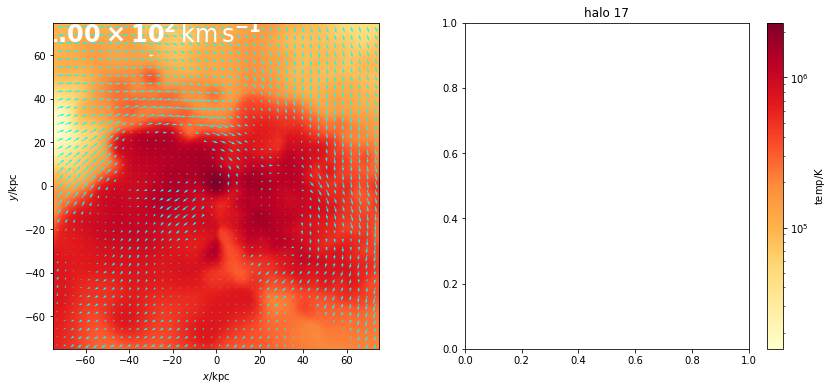

In [13]:
f, axs = plt.subplots(1,2,figsize=(14,6))
plt.title('halo 17')
sph.velocity_image(halo17.g, vector_color="cyan", qty="temp",width=150,cmap="YlOrRd",
                   denoise=True,approximate_fast=False, subplot=axs[0], show_cbar = True)
plt.savefig('Gas Flow Halo 17', dpi=300)
plt.show()

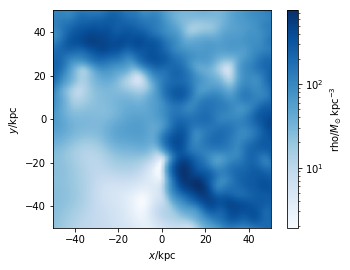

In [54]:
pynbody.plot.image(halo17.g, width=100, cmap='Blues')
plt.savefig('halo 17  gas')
plt.show()

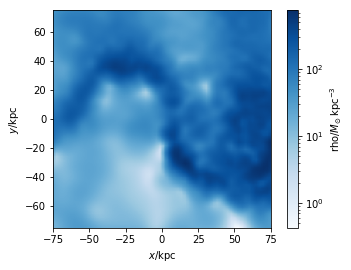

In [83]:
pynbody.plot.image(halo17.g, width=150, cmap='Blues')
plt.savefig('halo 17  gas')
plt.show()

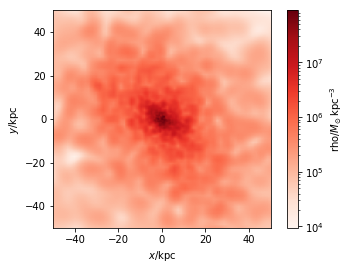

In [55]:
pynbody.plot.image(halo17.dm, width=100, cmap='Reds')
plt.savefig('halo 17  DM')
plt.show()

In [56]:
halo1d = h4.load_copy(1)
halo1d.physical_units()

pynbody.analysis.angmom.faceon(halo1d)

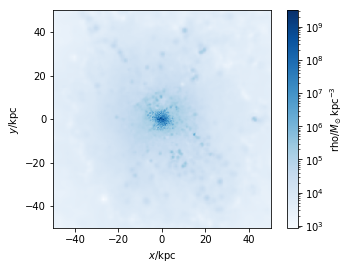

In [57]:
pynbody.plot.image(halo1d.g, width=100, cmap='Blues')
plt.savefig('halo 1d  gas')
plt.show()

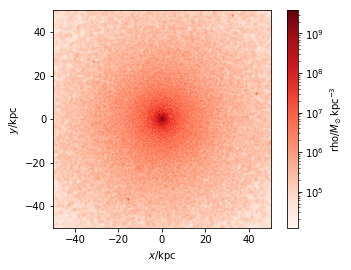

In [59]:
pynbody.plot.image(halo1d.dm, width=100, cmap='Reds')
plt.savefig('halo 1d  DM')
plt.show()

In [60]:
halo12 = h1.load_copy(12)
halo12.physical_units()

pynbody.analysis.angmom.faceon(halo12)

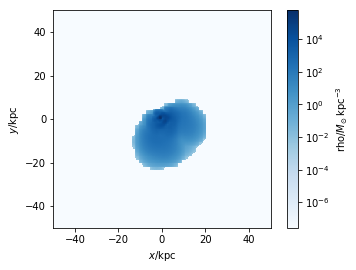

In [61]:
pynbody.plot.image(halo12.g, width=100, cmap='Blues')
plt.savefig('halo 12  gas')
plt.show()

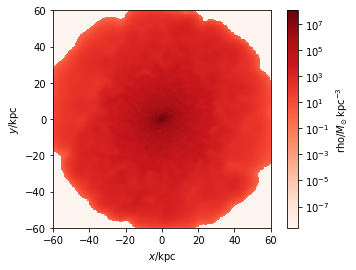

In [64]:
pynbody.plot.image(halo12.dm, width=120, cmap='Reds')
plt.savefig('halo 12  DM')
plt.show()

In [77]:
halo30 = h3.load_copy(30)
halo30.physical_units()

#pynbody.analysis.angmom.faceon(halo30)

In [72]:
halo133 = h3.load_copy(133)
halo133.physical_units()
 
#pynbody.analysis.angmom.faceon(halo133)

In [75]:
halo2891 = h3.load_copy(2891)
halo2891.physical_units()

#pynbody.analysis.angmom.faceon(halo2891)

In [76]:
halo95 = h1.load_copy(95)
halo95.physical_units()

pynbody.analysis.angmom.faceon(halo95)

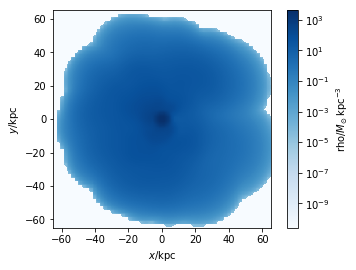

In [78]:
pynbody.plot.image(halo95.g, width=130, cmap='Blues')
plt.savefig('halo 95  gas')
plt.show()

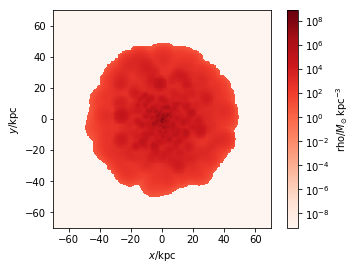

In [79]:
pynbody.plot.image(halo95.dm, width=140, cmap='Reds')
plt.savefig('halo 95  DM')
plt.show()

# False Halos?

In [84]:
data.keys()

Index(['B-V', 'B_mag', 'HIgasfrac', 'I_mag', 'Lx', 'Ly', 'Lz', 'M_gas',
       'M_star', 'R_mag', 'Rmax', 'Rvir', 'SFR', 'U_mag', 'V90/Vdisp', 'V_mag',
       'Xc', 'Yc', 'Zc', 'age', 'b_axis', 'c/a', 'c_axis', 'fMhires', 'feh',
       'gasfrac', 'h1dist', 'haloid', 'hostHalo', 'id2', 'mHI', 'mass',
       'n_gas', 'n_particles', 'n_star', 'ovdens', 'sSFR', 'sfh', 'sfhbins',
       'zgas', 'zstar'],
      dtype='object')

In [15]:
DarkM = []

for i in range(len(data4)):
    DM = data4['n_particles'][i] - data4['n_star'][i] - data4['n_gas'][i]
    if DM<1000:
        print(i)
        #dm = numpy.append(DarkM,DM)

20
21
22


In [29]:
for i in range(len(data4)):
    Star = data4['n_star'][i]
    if Star<10:
        print(i)

0
12
17
20


# Halo 17

In [31]:
data.keys()

Index(['B-V', 'B_mag', 'HIgasfrac', 'I_mag', 'Lx', 'Ly', 'Lz', 'M_gas',
       'M_star', 'R_mag', 'Rmax', 'Rvir', 'SFR', 'U_mag', 'V90/Vdisp', 'V_mag',
       'Xc', 'Yc', 'Zc', 'age', 'b_axis', 'c/a', 'c_axis', 'fMhires', 'feh',
       'gasfrac', 'h1dist', 'haloid', 'hostHalo', 'id2', 'mHI', 'mass',
       'n_gas', 'n_particles', 'n_star', 'ovdens', 'sSFR', 'sfh', 'sfhbins',
       'zgas', 'zstar'],
      dtype='object')

In [35]:
print(data1['HIgasfrac'][data1['haloid']==17])

12    48.49090580708228
Name: HIgasfrac, dtype: object


In [43]:
print(data1['SFR'][data1['haloid']==17])

12    0.0
Name: SFR, dtype: float64


In [66]:
from bulk import *

In [14]:
def distance_to_nearest_halo(data):
    distances = []
    for i in range(len(data)):
        halocoords = np.array([data['Xc'].tolist()[i],data['Yc'].tolist()[i],data['Zc'].tolist()[i]])
        nstars = np.delete(data['n_star'].tolist(),i)
        x = np.delete(data['Xc'].tolist(),i)
        y = np.delete(data['Yc'].tolist(),i)
        z = np.delete(data['Zc'].tolist(),i)
        x = x.tolist()
        y = y.tolist()
        z = z.tolist()
        coords = np.array([x,y,z])
        coords = np.transpose(coords)
        dist = np.min(np.sqrt(np.sum((halocoords - coords)**2, axis=1)))
        distances.append(dist)
    return np.array(distances)

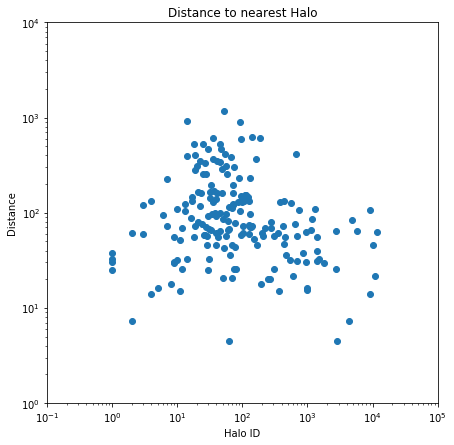

In [46]:
plt.figure(figsize=(7,7))
plt.scatter(data['haloid'], distance_to_nearest_halo(data))
#plt.scatter(data['haloid'][data1['haloid']==17], distance_to_nearest_halo(data[data1['haloid']==17]))
plt.loglog()
plt.ylim(1, 1e4)
plt.xlim(1e-1, 1e5)
plt.title('Distance to nearest Halo')
plt.xlabel('Halo ID')
plt.ylabel('Distance')
plt.savefig('Distance to nearest Halo')

plt.show()

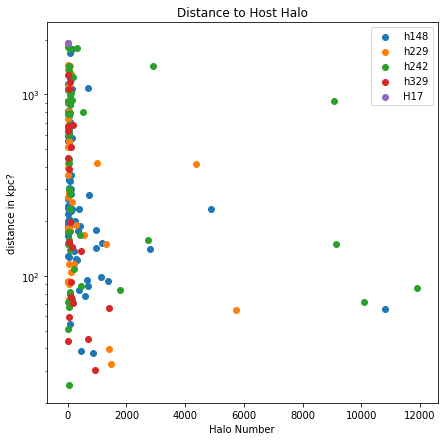

In [65]:
plt.figure(figsize=(7,7))
plt.scatter(data1['haloid'], data1['h1dist'], label='h148')
plt.scatter(data2['haloid'], data2['h1dist'], label='h229')
plt.scatter(data3['haloid'], data3['h1dist'], label='h242')
plt.scatter(data4['haloid'], data4['h1dist'], label='h329')
plt.scatter(data1['haloid'][data1['haloid']==17], data1['h1dist'][data1['haloid']==17], label='H17')

plt.semilogy()
plt.ylim(20,2500)
plt.xlabel('Halo Number')
plt.ylabel('distance in kpc?')
plt.title('Distance to Host Halo')
plt.legend()
plt.savefig('Distance to Host Halo')
plt.show()

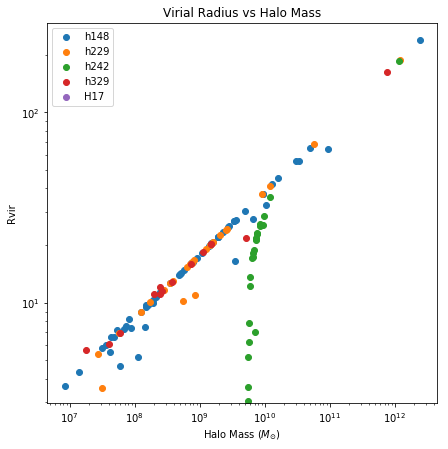

In [11]:
plt.figure(figsize=(7,7))
plt.scatter(data1['mass'], data1['Rvir'], label='h148')
plt.scatter(data2['mass'], data2['Rvir'], label='h229')
plt.scatter(data3['mass'], data3['Rvir'], label='h242')
plt.scatter(data4['mass'], data4['Rvir'], label='h329')
plt.scatter(data1['mass'][data1['haloid']==17], data1['Rvir'][data1['haloid']==17], label='H17')

plt.loglog()
plt.xlabel(r'Halo Mass ($M_{\odot}$)')
plt.ylabel('Rvir')
plt.title('Virial Radius vs Halo Mass')
plt.legend()
plt.savefig('Virial Radius vs Halo Mass')
plt.show()

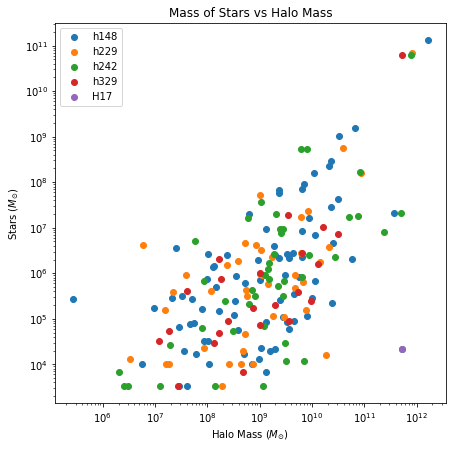

In [47]:
plt.figure(figsize=(7,7))
plt.scatter(data1['mass'], data1['M_star'], label='h148')
plt.scatter(data2['mass'], data2['M_star'], label='h229')
plt.scatter(data3['mass'], data3['M_star'], label='h242')
plt.scatter(data4['mass'], data4['M_star'], label='h329')
plt.scatter(data1['mass'][data1['haloid']==17], data1['M_star'][data1['haloid']==17], label='H17')

plt.loglog() 
plt.xlabel(r'Halo Mass ($M_{\odot}$)')
plt.ylabel(r'Stars ($M_{\odot}$)')
plt.title('Mass of Stars vs Halo Mass')
plt.legend()
plt.savefig('Mass of Stars vs Halo Mass')
plt.show()

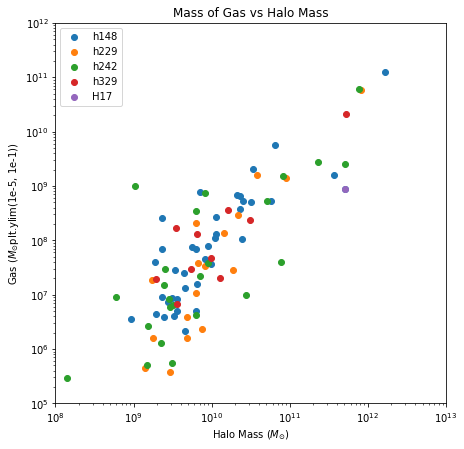

In [50]:
plt.figure(figsize=(7,7))
plt.scatter(data1['mass'], data1['M_gas'], label='h148')
plt.scatter(data2['mass'], data2['M_gas'], label='h229')
plt.scatter(data3['mass'], data3['M_gas'], label='h242')
plt.scatter(data4['mass'], data4['M_gas'], label='h329')
plt.scatter(data1['mass'][data1['haloid']==17], data1['M_gas'][data1['haloid']==17], label='H17')
plt.loglog()
plt.legend()
plt.ylim(1e5, 1e12)
plt.xlim(1e8, 1e13)
plt.xlabel(r'Halo Mass ($M_{\odot}$)')
plt.ylabel(r'Gas ($M_{\odot}$plt.ylim(1e-5, 1e-1))')
plt.title('Mass of Gas vs Halo Mass')
plt.savefig('Mass of Gas vs Halo Mass')
plt.show()

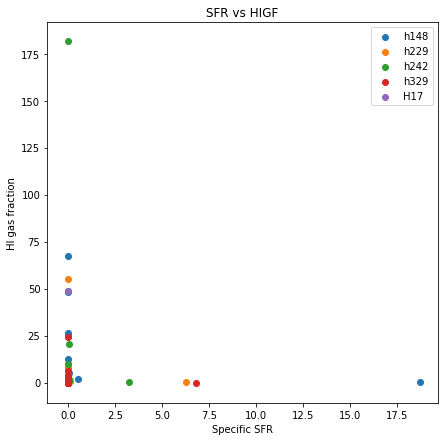

In [46]:
plt.figure(figsize=(7,7))
plt.scatter(data1['SFR'], data1['HIgasfrac'], label='h148')
plt.scatter(data2['SFR'], data2['HIgasfrac'], label='h229')
plt.scatter(data3['SFR'], data3['HIgasfrac'], label='h242')
plt.scatter(data4['SFR'], data4['HIgasfrac'], label='h329')
plt.scatter(data1['SFR'][data1['haloid']==17], data1['HIgasfrac'][data1['haloid']==17], label='H17')

plt.legend()
plt.xlabel (r'Specific SFR')
plt.ylabel (r'HI gas fraction')
plt.title ('SFR vs HIGF')
plt.savefig('SFR vs HIGF')
plt.show()

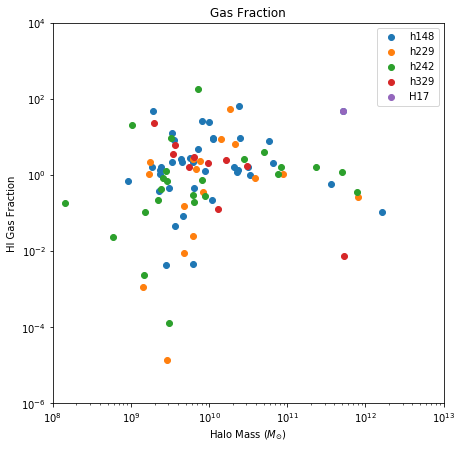

In [51]:
plt.figure(figsize=(7,7))
plt.scatter(data1['mass'], data1['HIgasfrac'], label='h148')
plt.scatter(data2['mass'], data2['HIgasfrac'], label='h229')
plt.scatter(data3['mass'], data3['HIgasfrac'], label='h242')
plt.scatter(data4['mass'], data4['HIgasfrac'], label='h329')
plt.scatter(data1['mass'][data1['haloid']==17], data1['HIgasfrac'][data1['haloid']==17], label='H17')

plt.loglog()
plt.xlim(1e8,1e13)
plt.xlabel(r'Halo Mass ($M_{\odot}$)')
plt.ylabel('HI Gas Fraction')
plt.ylim(1e-6, 1e4)
plt.title('Gas Fraction')
plt.legend()
plt.savefig('Gas Fraction')
plt.show()

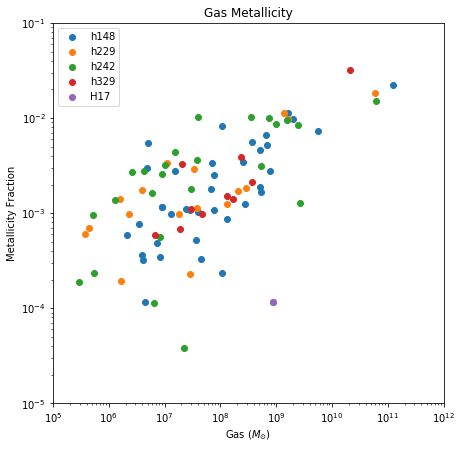

In [52]:
plt.figure(figsize=(7,7))
plt.scatter(data1['M_gas'], data1['zgas'], label='h148')
plt.scatter(data2['M_gas'], data2['zgas'], label='h229')
plt.scatter(data3['M_gas'], data3['zgas'], label='h242')
plt.scatter(data4['M_gas'], data4['zgas'], label='h329')
plt.scatter(data1['M_gas'][data1['haloid']==17], data1['zgas'][data1['haloid']==17], label='H17')

plt.loglog()
plt.legend()
plt.ylim(1e-5, 1e-1)
plt.xlim(1e5, 1e12)
plt.xlabel(r'Gas ($M_{\odot}$)')
plt.ylabel('Metallicity Fraction')
plt.title('Gas Metallicity')
plt.savefig('Gas Metallicity')
plt.show()

In [98]:
halo12 = h1.load_copy(12)

halo12.physical_units()

print(data1['n_star'][data1['haloid'] == 12])
print(data1['n_gas'][data1['haloid'] == 12])
print(len(halo12.dm))

9    21027
Name: n_star, dtype: int64
9    264
Name: n_gas, dtype: int64
216584


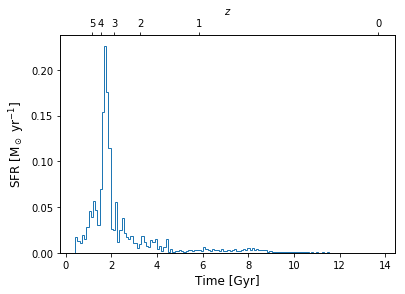

In [99]:
pynbody.plot.stars.sfh(halo12, filename=None, massform=True, clear=False, legend=False, subplot=False, trange=False, bins=138)

plt.savefig('halo 12 SFH')

plt.show()

In [102]:
print(data1['n_star'][data1['haloid']==12])

9    21027
Name: n_star, dtype: int64


# Halo 30

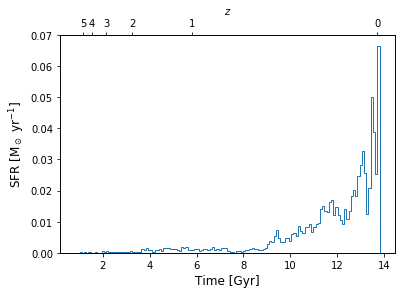

In [13]:
pynbody.plot.stars.sfh(halo30, filename=None, massform=True, clear=False, legend=False, subplot=False, trange=False, bins=138)

plt.savefig('halo 30 SFH')

plt.show()

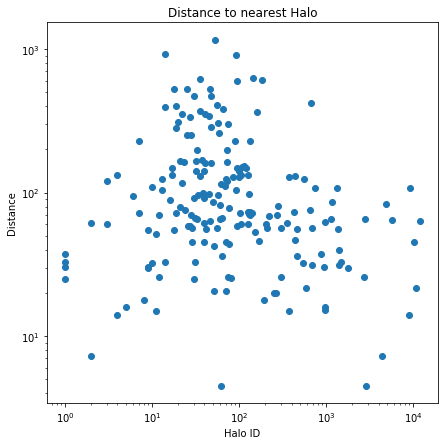

In [74]:
plt.figure(figsize=(7,7))
plt.scatter(data['haloid'], distance_to_nearest_halo(data))
#plt.scatter(data['haloid'][data1['haloid']==17], distance_to_nearest_halo(data[data1['haloid']==17]))
plt.loglog()
#plt.ylim(25,26)
#plt.xlim(29, 31)
plt.title('Distance to nearest Halo')
plt.xlabel('Halo ID')
plt.ylabel('Distance')
plt.savefig('Distance to nearest Halo')

plt.show()

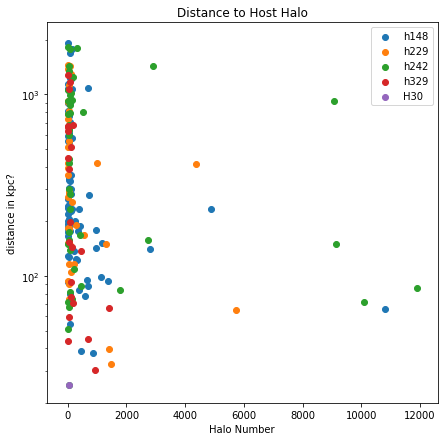

In [69]:
plt.figure(figsize=(7,7))
plt.scatter(data1['haloid'], data1['h1dist'], label='h148')
plt.scatter(data2['haloid'], data2['h1dist'], label='h229')
plt.scatter(data3['haloid'], data3['h1dist'], label='h242')
plt.scatter(data4['haloid'], data4['h1dist'], label='h329')
plt.scatter(data3['haloid'][data3['haloid']==30], data3['h1dist'][data3['haloid']==30], label='H30')

plt.semilogy()
plt.ylim(20,2500)
plt.xlabel('Halo Number')
plt.ylabel('distance in kpc?')
plt.title('Distance to Host Halo')
plt.legend()
plt.savefig('Distance to Host Halo')
plt.show()

In [75]:
print (data3['h1dist'][data3['haloid']==30])
print (data3['Rvir'][data3['haloid']==1])

9    25.07101
Name: h1dist, dtype: float64
0    186.66
Name: Rvir, dtype: float64


# Halo 53

In [52]:
halo53 = h3.load_copy(53)
halo53.physical_units()

In [91]:
print(data3['n_gas'][data3['haloid']==53])
print(data3['n_star'][data3['haloid']==53])
print(data3['n_particles'][data3['haloid']==53])
print(len(halo53.dm))
print(data3['Rvir'][data3['haloid']==53])

17    2094
Name: n_gas, dtype: int64
17    733
Name: n_star, dtype: int64
17    37503
Name: n_particles, dtype: int64
34676
17    42.1
Name: Rvir, dtype: float64


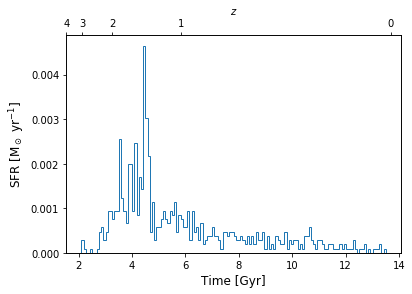

In [108]:
pynbody.plot.stars.sfh(halo53, filename=None, massform=True, clear=False, legend=False, subplot=False, trange=False, bins=138)

plt.savefig('halo 53 SFH')

plt.show()

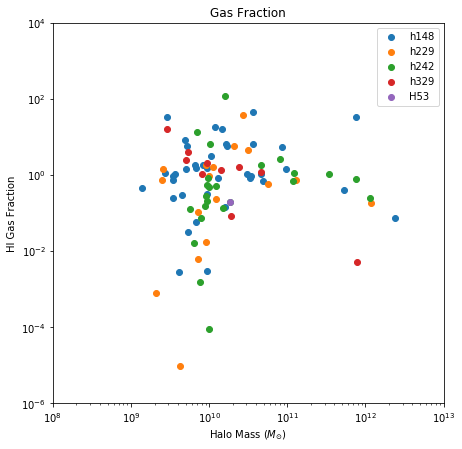

In [55]:
plt.figure(figsize=(7,7))
plt.scatter(data1['mass'], data1['HIgasfrac'], label='h148')
plt.scatter(data2['mass'], data2['HIgasfrac'], label='h229')
plt.scatter(data3['mass'], data3['HIgasfrac'], label='h242')
plt.scatter(data4['mass'], data4['HIgasfrac'], label='h329')
plt.scatter(data3['mass'][data3['haloid']==53], data3['HIgasfrac'][data3['haloid']==53], label='H53')

plt.loglog()
plt.xlim(1e8,1e13)
plt.xlabel(r'Halo Mass ($M_{\odot}$)')
plt.ylabel('HI Gas Fraction')
plt.ylim(1e-6, 1e4)
plt.title('Gas Fraction')
plt.legend()
plt.savefig('Gas Fraction')
plt.show()

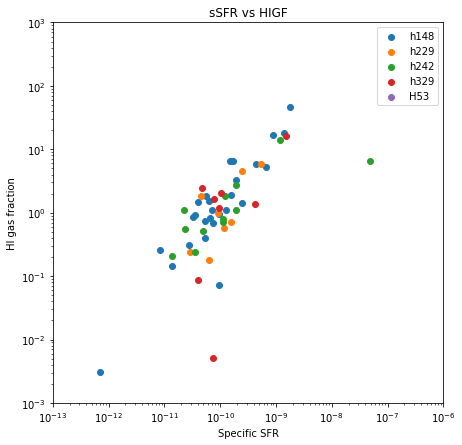

In [68]:
plt.figure(figsize=(7,7))
plt.scatter(data1['sSFR'], data1['HIgasfrac'], label='h148')
plt.scatter(data2['sSFR'], data2['HIgasfrac'], label='h229')
plt.scatter(data3['sSFR'], data3['HIgasfrac'], label='h242')
plt.scatter(data4['sSFR'], data4['HIgasfrac'], label='h329')
plt.scatter(data3['sSFR'][data3['haloid']==53], data3['HIgasfrac'][data3['haloid']==53], label='H53')
plt.loglog()
plt.semilogy()
plt.legend()
plt.ylim (1e-3, 1e3)
plt.xlim (1e-13, 1e-6)
plt.xlabel (r'Specific SFR')
plt.ylabel (r'HI gas fraction')
plt.title ('sSFR vs HIGF')
plt.savefig('sSFR vs HIGF')
plt.show()

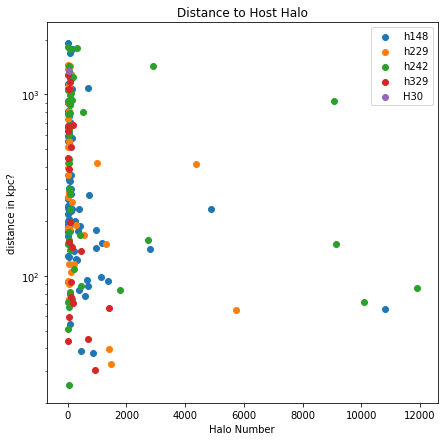

In [78]:
plt.figure(figsize=(7,7))
plt.scatter(data1['haloid'], data1['h1dist'], label='h148')
plt.scatter(data2['haloid'], data2['h1dist'], label='h229')
plt.scatter(data3['haloid'], data3['h1dist'], label='h242')
plt.scatter(data4['haloid'], data4['h1dist'], label='h329')
plt.scatter(data3['haloid'][data3['haloid']==53], data3['h1dist'][data3['haloid']==53], label='H30')

plt.semilogy()
plt.ylim(20,2500)
plt.xlabel('Halo Number')
plt.ylabel('distance in kpc?')
plt.title('Distance to Host Halo')
plt.legend()
plt.savefig('Distance to Host Halo')
plt.show()

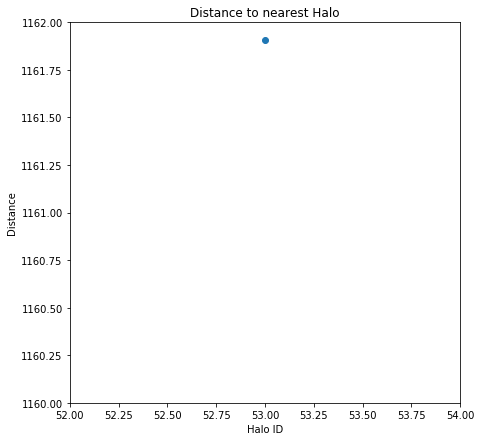

In [87]:
plt.figure(figsize=(7,7))
plt.scatter(data3['haloid'], distance_to_nearest_halo(data3))
#plt.scatter(data['haloid'][data1['haloid']==17], distance_to_nearest_halo(data[data1['haloid']==17]))
#plt.loglog()
plt.ylim(1160,1162)
plt.xlim(52, 54)
plt.title('Distance to nearest Halo')
plt.xlabel('Halo ID')
plt.ylabel('Distance')
plt.savefig('Distance to nearest Halo')

plt.show()

In [92]:
#pynbody.analysis.angmom.faceon(halo53)

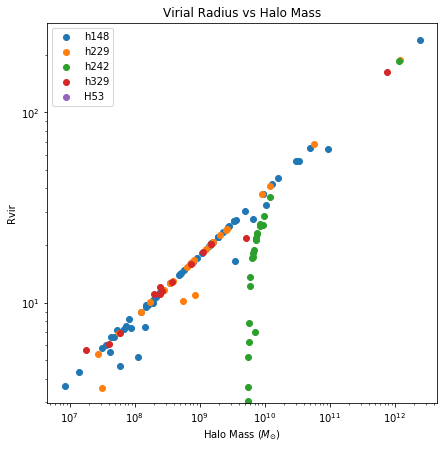

In [9]:
plt.figure(figsize=(7,7))
plt.scatter(data1['mass'], data1['Rvir'], label='h148')
plt.scatter(data2['mass'], data2['Rvir'], label='h229')
plt.scatter(data3['mass'], data3['Rvir'], label='h242')
plt.scatter(data4['mass'], data4['Rvir'], label='h329')
plt.scatter(data3['mass'][data3['haloid']==53], data3['Rvir'][data3['haloid']==53], label='H53')

plt.loglog()
plt.xlabel(r'Halo Mass ($M_{\odot}$)')
plt.ylabel('Rvir')
plt.title('Virial Radius vs Halo Mass')
plt.legend()
plt.savefig('Virial Radius vs Halo Mass')
plt.show()

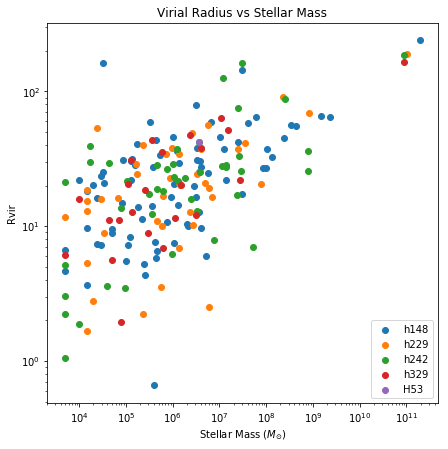

In [95]:
plt.figure(figsize=(7,7))
plt.scatter(data1['M_star'], data1['Rvir'], label='h148')
plt.scatter(data2['M_star'], data2['Rvir'], label='h229')
plt.scatter(data3['M_star'], data3['Rvir'], label='h242')
plt.scatter(data4['M_star'], data4['Rvir'], label='h329')
plt.scatter(data3['M_star'][data3['haloid']==53], data3['Rvir'][data3['haloid']==53], label='H53')

plt.loglog()
plt.xlabel(r'Stellar Mass ($M_{\odot}$)')
plt.ylabel('Rvir')
plt.title('Virial Radius vs Stellar Mass')
plt.legend()
plt.savefig('Virial Radius vs Stellar Mass')
plt.show()

In [100]:
M_dm1 = data1['mass']-data1['M_star']-data1['M_gas']
M_dm2 = data2['mass']-data2['M_star']-data2['M_gas']
M_dm3 = data3['mass']-data3['M_star']-data3['M_gas']
M_dm4 = data4['mass']-data4['M_star']-data4['M_gas']

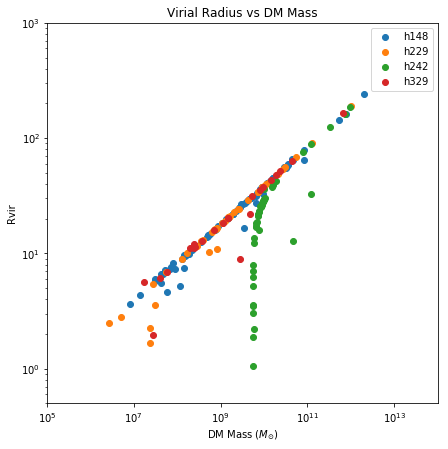

In [116]:
plt.figure(figsize=(7,7))
plt.scatter(M_dm1, data1['Rvir'], label='h148')
plt.scatter(M_dm2, data2['Rvir'], label='h229')
plt.scatter(M_dm3, data3['Rvir'], label='h242')
plt.scatter(M_dm4, data4['Rvir'], label='h329')

plt.loglog()
plt.ylim(.5, 1e3)
plt.xlim(1e5, 1e14)
plt.xlabel(r'DM Mass ($M_{\odot}$)')
plt.ylabel('Rvir')
plt.title('Virial Radius vs DM Mass')
plt.legend()
plt.savefig('Virial Radius vs DM Mass')
plt.show()